# Homework - Supervised Learning

---

Kelompok 2:

*   Oei, Gabrielle Maureen B.S
*   Ummi Sarah
*   Arini Arumsari
*   Althaaf Athaayaa Daffa Qushayyizidane
*   Ruslan Hadi
*   Muhammad Ikhsan Hendriyana
*   Taufik Ismail
*   Jackson
*   Tsany Sutia

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import uniform
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance

import gdown

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Descriptive Statistics

## Load Data

In [ ]:
! gdown --id 13mYuGTlcGF7PyX5TIpgfIqzQiwi4VmVB

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13mYuGTlcGF7PyX5TIpgfIqzQiwi4VmVB
To: /content/youtube_statistics.xlsx
100% 10.7M/10.7M [00:00<00:00, 46.5MB/s]


In [ ]:
# Melakukan import csv
df = pd.read_excel("youtube_statistics.xlsx")
df.sample(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
13323,2018-01-26,Warangal Collector Amrapali to marry IPS Samee...,TV9 Trending,25,13:07:27,"tv9|""tv9 live""|""tv9 news""|""tv9 telugu""|""tv9 ap...",465082,1662,288,218,False,False,False,Warangal Collector Amrapali to marry IPS Samee...,11,416,99,2018-01-23
1561,2017-11-22,अब तक का सबसे बड़ा खुलासा | Education System in...,Dr. Vivek Bindra: Motivational Speaker,27,11:13:58,"Education system|""MBA""|""Curriculum""|""best Univ...",679247,101042,819,4534,False,False,False,In this video Dr. Vivek Bindra exposes the Big...,27,2233,84,2017-11-18
21820,2018-03-18,योगी की हार के बाद मोदी ने दिया विपक्ष को तगड़...,Only News 24x7,25,10:52:47,"modi on manrega|""congress""|""india""|""narendra m...",1270959,8876,5064,1994,False,False,False,योगी की हार के बाद मोदी ने दिया विपक्ष को तगड़...,40,52,52,2018-03-15
16600,2018-02-14,Agnisakshi - 12th February 2018 - ಅಗ್ನಿಸಾಕ್ಷಿ,Colors Kannada,24,05:16:27,"Colors Kannada|""ETV Kannada""|""colorskannada""|""...",81096,162,52,10,False,False,False,To watch the full episode of 'Agnisakshi' anyt...,20,625,45,2018-02-13
15692,2018-02-09,SHOCKING.! See How Vijay Devarakonda Reacted O...,News Cabin,24,15:09:58,"NEWSCABIN|""vijay devarakonda about anasuya""|""D...",125924,343,197,72,False,False,False,Watch : SHOCKING.! See How Vijay Devarakonda R...,17,1051,100,2018-02-06


## Describe Data

In [ ]:
# Mengecek apakah ada data yang NaN/Null
print(df.isnull().values.any())
print(df.isna().sum())

True
trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64


**Observasi =**

Terdapat 1 kolom missing value yaitu kolom **'description'** sejumlah 45 baris.

In [ ]:
# Mengecek Datatype tiap kolom berserta non-null kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

**Observasi =**

* Dataframe terdiri dari 18 kolom dan 36791 baris.
* Dataframe memiliki 9 kategorikal kolom, 1 datetime, dan 8 numerikal.
* Kolom ***'views'*** adalah target dari dataset.
* Terdapat kesalahan data tipe di kolom 'trending_date' yang seharusnya merupakan datetime.

In [ ]:
# Pengelompokan kolom berdasarkan jenisnya
nums = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
nums = df.select_dtypes(include=nums)
nums = nums.columns

cats = ['object','bool']
cats = df.select_dtypes(include=cats)
cats = cats.columns

timestamp = ['publish_date']

In [ ]:
# Mengecek summary deskripsi statistika numerik
df[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [ ]:
# Mengecek summary deskripsi statistika kategorikal
df[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
count,36791,36791,36791,36791,36791,36791,36791,36791,36746
unique,205,16431,1390,12375,12463,2,2,2,13979
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,199,19,284,333,1120,35611,36034,36780,166


In [ ]:
# Mengecek summary deskripsi statistika timestamp
df[timestamp].describe(include='all')

,publish_date
count,36791
unique,219
top,2018-05-17 00:00:00
freq,318
first,2017-05-27 00:00:00
last,2018-06-13 00:00:00


**Observasi =**

Numerikal
* category_id: antara mean dan median terdapat sedikit sekali selisih kemungkinan masih terdistribusi normal.
* views: mean > median, *positive skewed*.
* likes: mean > median, *positive skewed*.
* dislikes: mean > median, *positive skewed*.
* comment_count: mean > median, *positive skewed*.
* No_tags: antara mean dan median mendekati seimbang, terdistribusi normal.
* desc_len: mean > median, *positive skewed*.
* len_title: antara mean dan median terdapat sedikit sekali selisih kemungkinan masih terdistribusi normal.

Categorical
* trending_date: terdapat 205 unique values.
* title: terdapat 16431 unique values. (harus dilihat lebih dalam apakah kolom merupakan duplikasi/tidak)
* channel_title: terdapat 1390 unique channels.
* publish_time: terdapat 12375 unique times.
* tags: terdapat 12463 unique tags.
* comment_disabled: terdapat 2 unique value (boolean) dengan mayoritas False.
* ratings_disabled: terdapat 2 unique value (boolean) dengan mayoritas False.
* video_error_or_removed: terdapat 2 unique value (boolean) dengan mayoritas False.
* description: terdapat 13979 unique descriptions.

Timestamp
* publish_date: terdapat 219 unique datatimes.

In [ ]:
# Mengecek unique value, modus, dan frekuensi modus dari tiap kolom
num = df[nums]
for i in nums:
  x = num[i].mode()[0]
  y = num[i].value_counts()[x]
  z = num[i].nunique()
  print(f'Terdapat {z} unique values dan modus dari kolom {i} = {x} dengan frekuensi sebesar {y}')

Terdapat 17 unique values dan modus dari kolom category_id = 24 dengan frekuensi sebesar 16462
Terdapat 31638 unique values dan modus dari kolom views = 105397 dengan frekuensi sebesar 5
Terdapat 15473 unique values dan modus dari kolom likes = 0 dengan frekuensi sebesar 757
Terdapat 5072 unique values dan modus dari kolom dislikes = 0 dengan frekuensi sebesar 766
Terdapat 6024 unique values dan modus dari kolom comment_count = 0 dengan frekuensi sebesar 1294
Terdapat 66 unique values dan modus dari kolom No_tags = 10 dengan frekuensi sebesar 2052
Terdapat 2850 unique values dan modus dari kolom desc_len = 295 dengan frekuensi sebesar 193
Terdapat 91 unique values dan modus dari kolom len_title = 100 dengan frekuensi sebesar 1746


In [ ]:
# Mengecek ukuran penyebaran
num = df[nums]
for i in num:
  minv = num[i].min()
  maxv = num[i].max()
  Q1 = num[i].quantile(.25)
  Q3 = num[i].quantile(.75)
  total_range = maxv-minv
  var = round(num[i].var(),2)
  iqr = Q3-Q1
  print (f'Ukuran penyebaran dari kolom {i}, variance = {var}, range = {total_range}, IQR = {iqr}')

Ukuran penyebaran dari kolom category_id, variance = 43.38, range = 42, IQR = 1.0
Ukuran penyebaran dari kolom views, variance = 10285805017210.0, range = 125428213, IQR = 681027.5
Ukuran penyebaran dari kolom likes, variance = 9570962238.38, range = 2912710, IQR = 13216.0
Ukuran penyebaran dari kolom dislikes, variance = 262353072.81, range = 1545017, IQR = 923.0
Ukuran penyebaran dari kolom comment_count, variance = 224343908.82, range = 827755, IQR = 1231.5
Ukuran penyebaran dari kolom No_tags, variance = 96.9, range = 71, IQR = 13.0
Ukuran penyebaran dari kolom desc_len, variance = 664288.36, range = 5133, IQR = 869.0
Ukuran penyebaran dari kolom len_title, variance = 502.17, range = 95, IQR = 38.0


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# Pengelompokan kolom berdasarkan jenisnya
print(nums)
print(cats)
print(timestamp)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags',
       'desc_len', 'len_title'],
      dtype='object')
Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description'],
      dtype='object')
['publish_date']


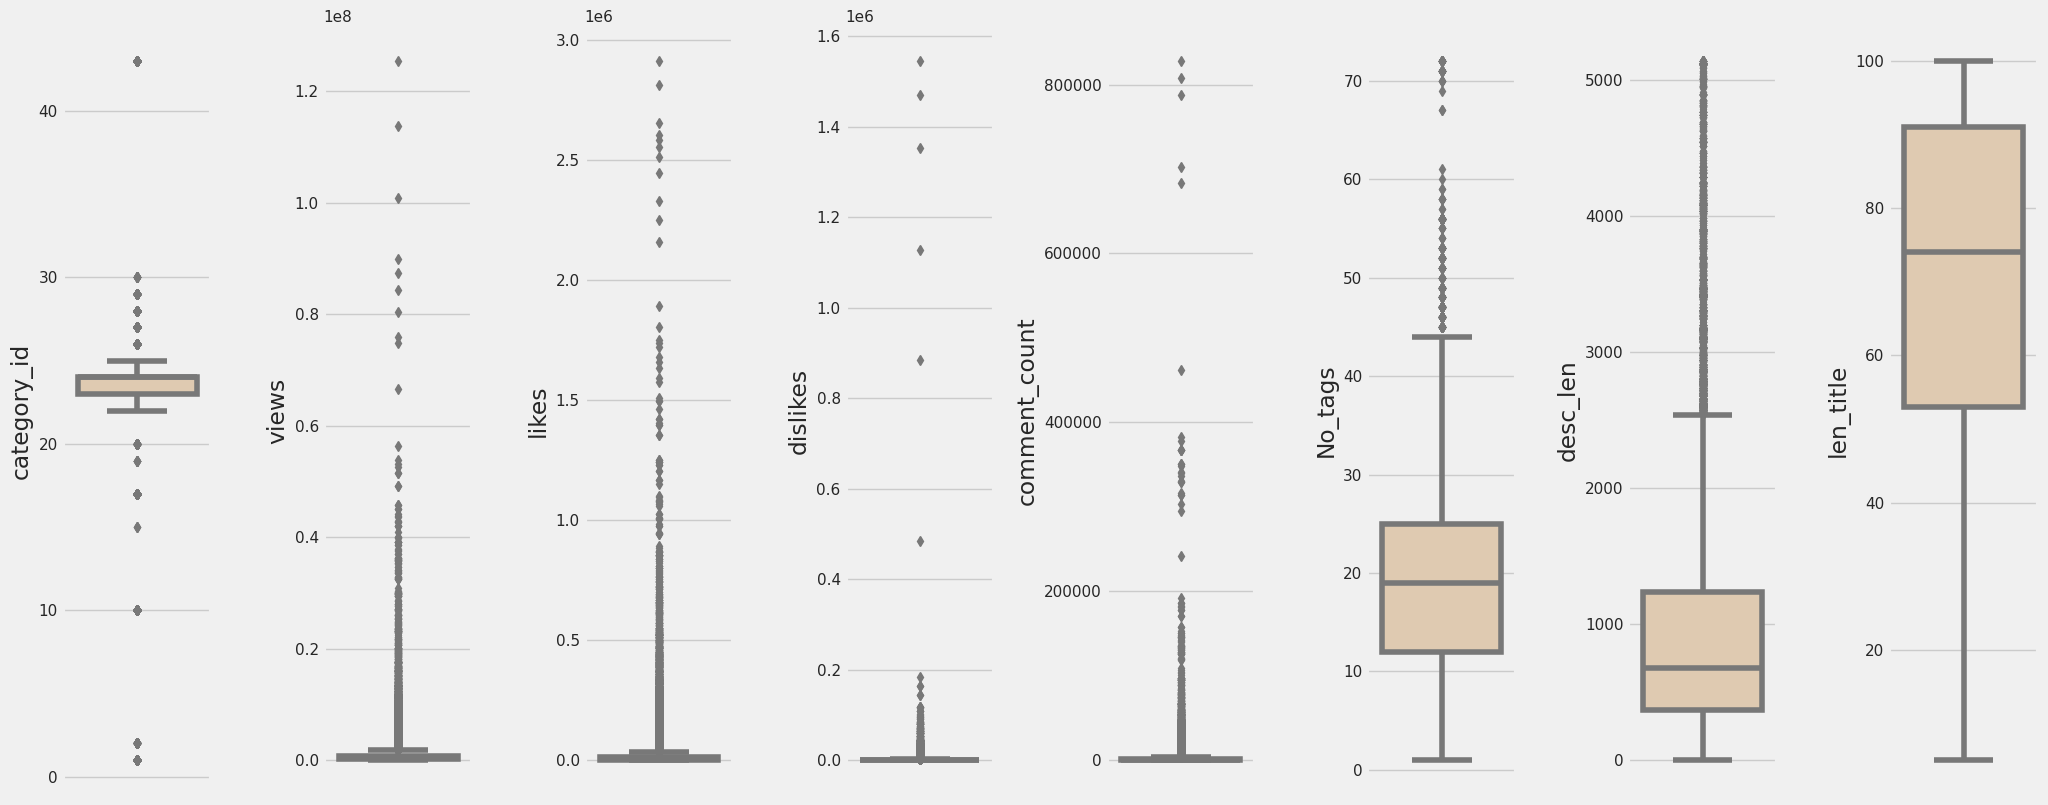

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color = '#E7CBA9', data=df, orient = 'v')
    plt.tight_layout()

**Observasi =**

*   category_id: Distribusi normal, terdapat outliers di atas batas atas dan di bawah batas bawah
*   views: terdapat outliers diatas batas atas.
*   likes: terdapat outliers diatas batas atas.
*   dislikes: terdapat outliers diatas batas atas.
*   comment_count: terdapat outliers diatas batas atas.
*   No_tags: cenderung *positive skewed*, terdapat outliers diatas batas atas.
*   desc_len: cenderung *positive skewed*, terdapat outliers diatas batas atas.
*   len_title: cenderung *negative skewed*.

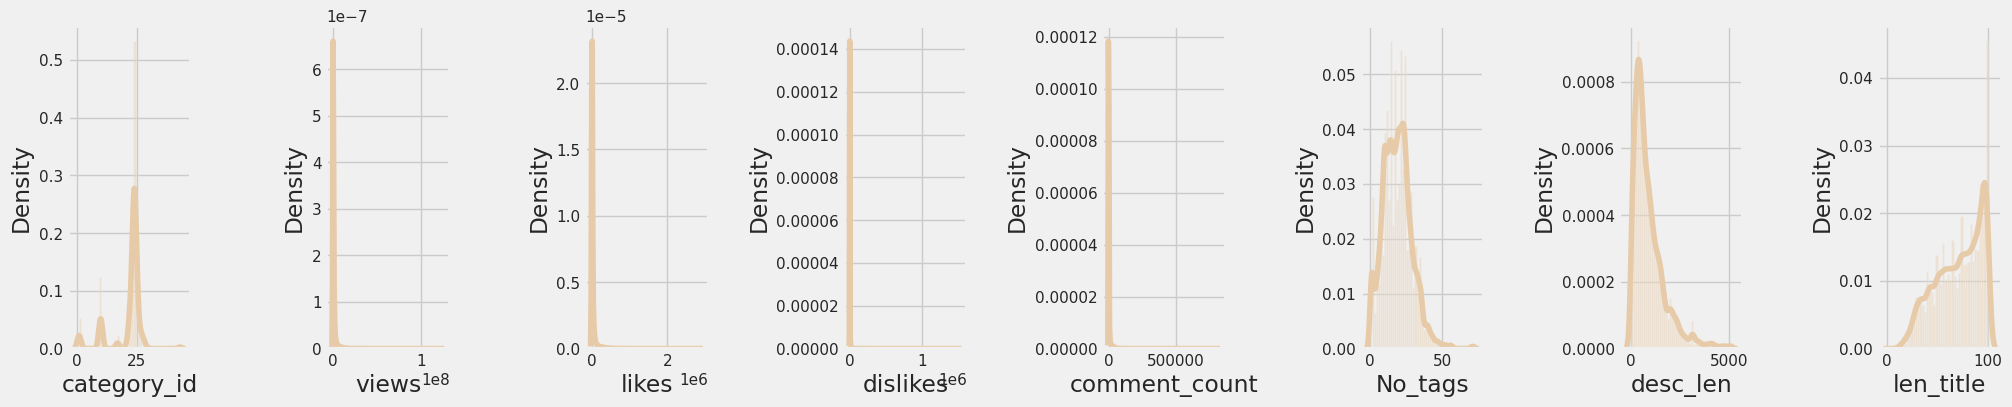

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='#E7CBA9')
    plt.tight_layout(pad=2)

**Observasi =**

*   category_id: distribusi normal namun terdapat outliers.
*   views: ditstribusi*positive skewed*, terdapat outliers diatas batas atas.
*   likes:
*   dislikes: ditstribusi *positive skewed*, terdapat outliers diatas batas atas.
*   comment_count: ditstribusi *positive skewed*, terdapat outliers diatas batas atas.
*   No_tags: ditstribusi *positive skewed*.
*   desc_len: ditstribusi *positive skewed*.
*   len_title: ditstribusi *negative skewed*.

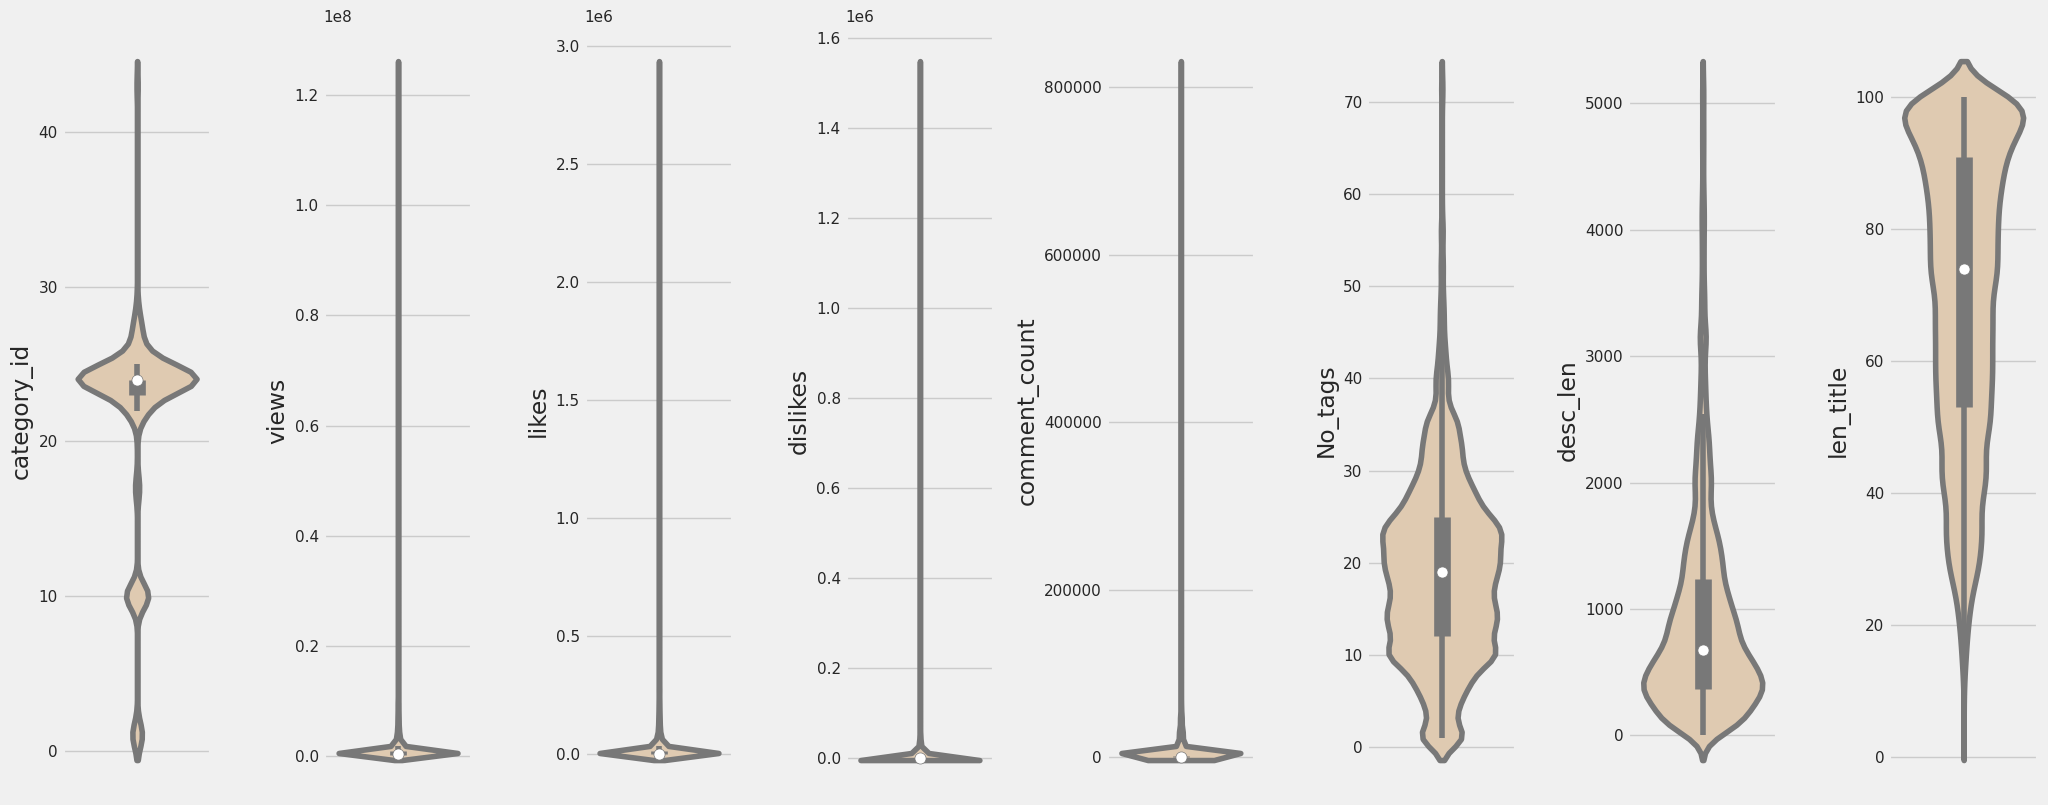

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='#E7CBA9', orient='v')
    plt.tight_layout()

**Observasi =**

*   category_id: distribusi value banyak di antara 20 - 30.
*   views: ditstribusi value banyak di 0 - 10.000.000.
*   likes: ditstribusi value banyak di 0 - 100.000.
*   dislikes: ditstribusi value banyak di 0 - 100.000.
*   comment_count: ditstribusi value banyak di 0 - 5000.
*   No_tags: distribusi value banyak di antara 10 - 25.
*   desc_len: ditstribusi value banyak di bawah 1000.
*   len_title: ditstribusi value banyak di atas 90.

In [ ]:
data_cat = df.select_dtypes(include=[object,bool])
cat_unique = data_cat.nunique().reset_index()
cat_unique.columns = ['features','unique_values']
cat_unique = cat_unique.sort_values('unique_values', ascending=False)
cat_unique

,features,unique_values
1,title,16431
8,description,13979
4,tags,12463
3,publish_time,12375
2,channel_title,1390
0,trending_date,205
5,comments_disabled,2
6,ratings_disabled,2
7,video_error_or_removed,2


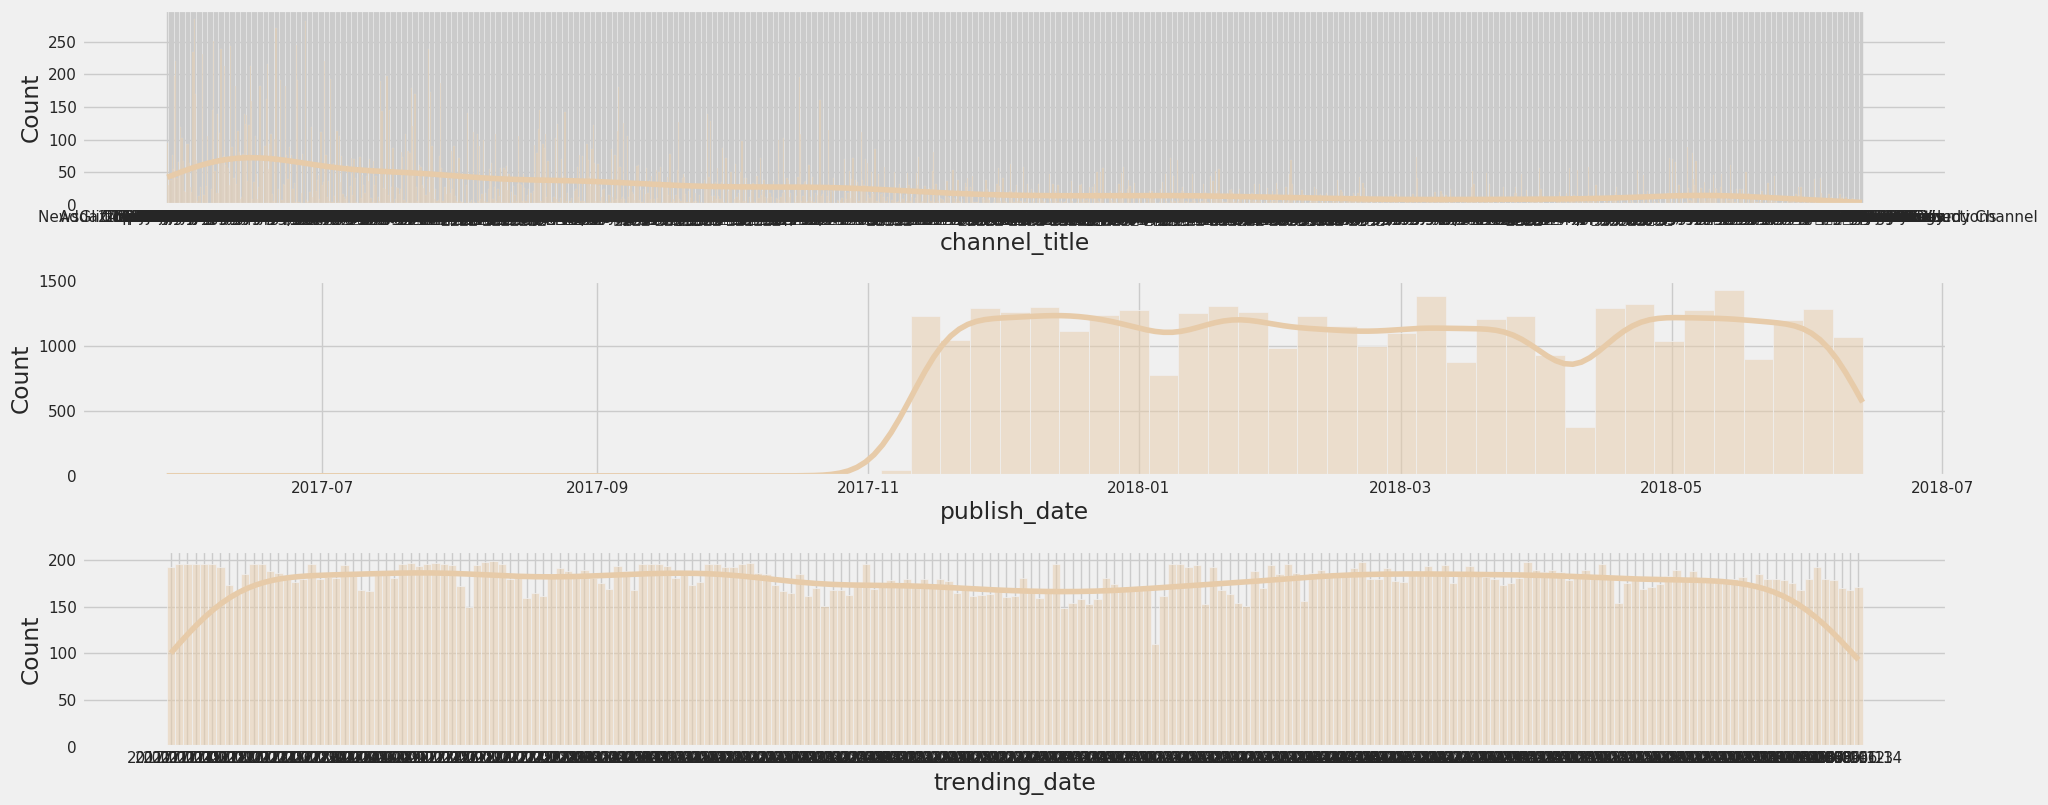

In [ ]:
test_hist = ['channel_title','publish_date','trending_date']
for i in range(0, len(test_hist)):
    plt.subplot(len(test_hist), 1, i+1)
    sns.histplot(data=df, x=df[test_hist[i]], color='#E7CBA9', kde=True)
    plt.tight_layout()

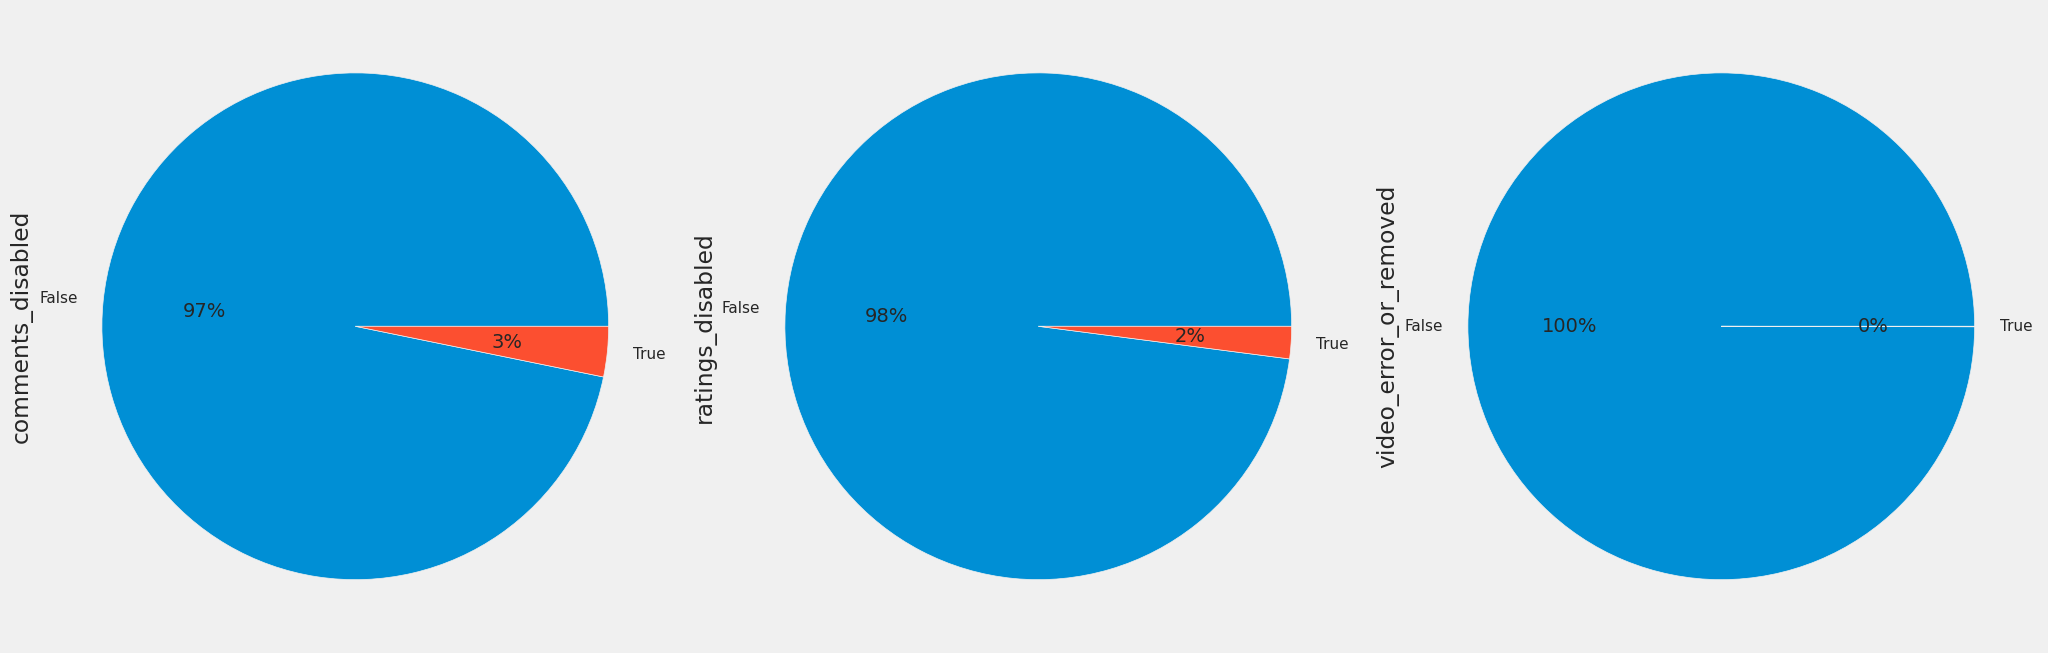

In [ ]:
test_pie = ['comments_disabled','ratings_disabled','video_error_or_removed']

for i in range(0, len(test_pie)):
    plt.subplot(1,len(test_pie), i+1)
    df[test_pie[i]].value_counts().plot(kind = 'pie',autopct='%1.0f%%')
    plt.tight_layout()

**Observasi =**
* Features `'trending_date'`, `'title'`, `'channel_title'`, `'publish_time'`, `'tags'`, `'description'` merupakan data non kategorikal (non-linear) memiliki value unique yang sangat banyak sehingga features ini tidak dianjurkan untuk digunakan sebagai features modelling, karena hal ini dapat menyebabkan model terlalu sensitive dan menyebabkan *overfitting*.
* Features `'comments_disabled'`, `'ratings_disabled'`, `'video_error_or_removed'` merupakan data non-linear yang memiliki 2 value unique dimana merepresentasikan suatu boolean (bimodal).

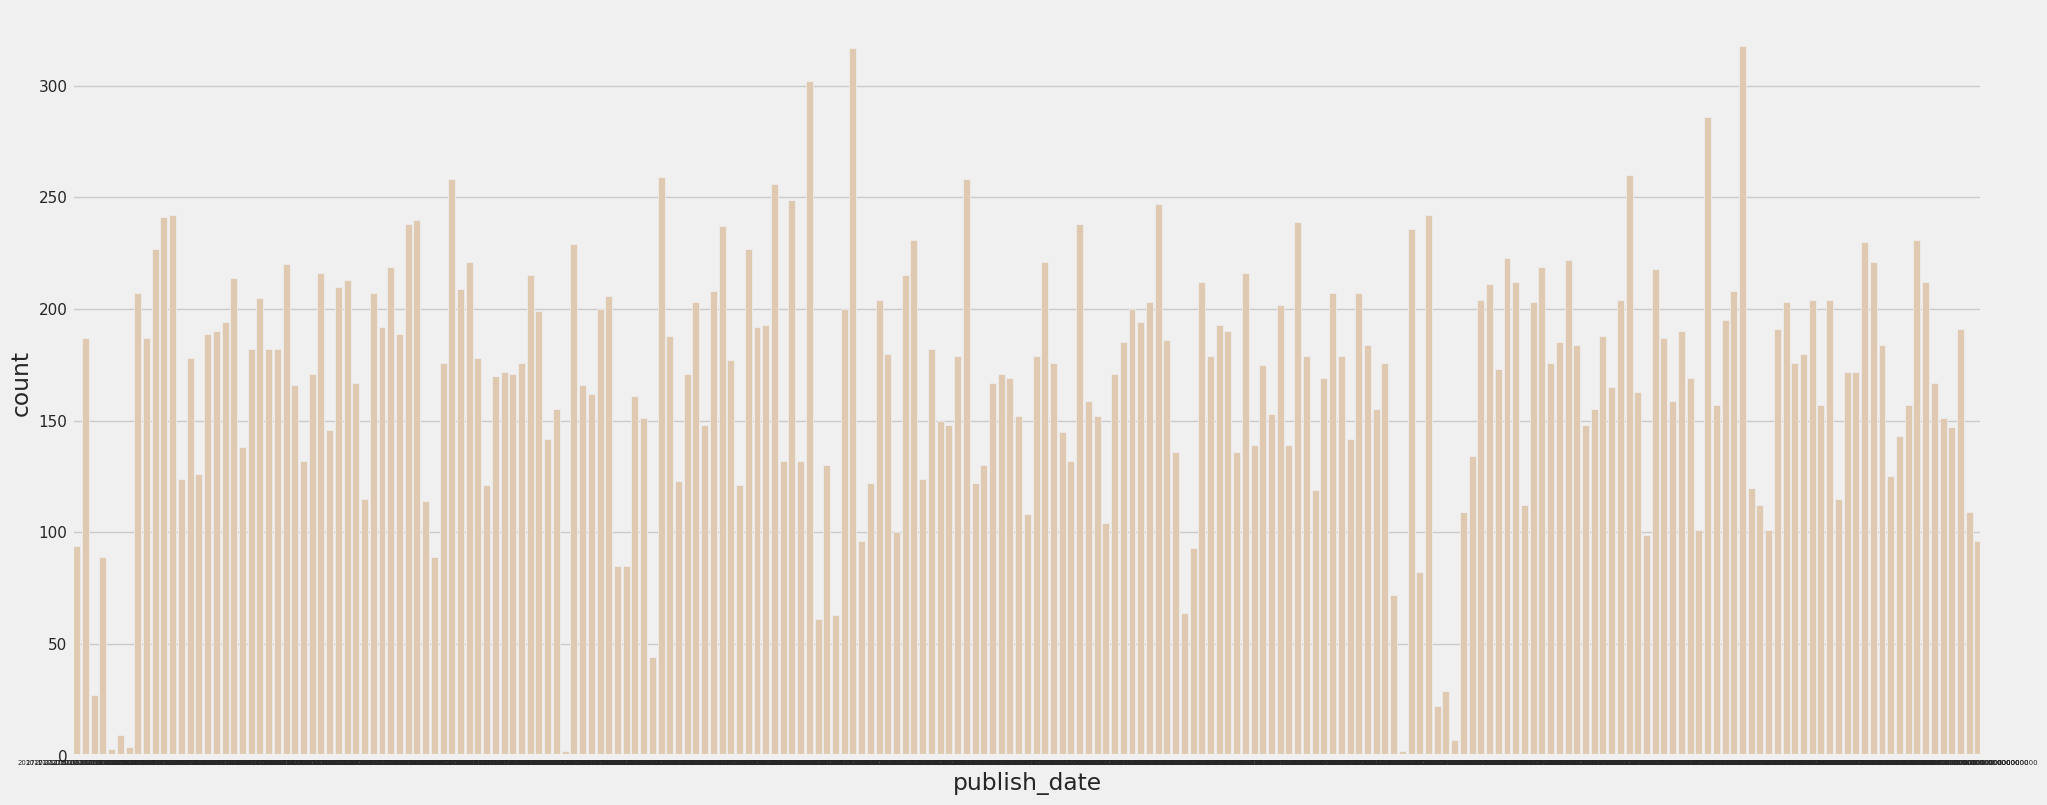

In [ ]:
for i in range(0, len(timestamp)):
    plt.subplot(1,len(timestamp), i+1)
    sns.countplot(x=df[timestamp[i]], color='#E7CBA9')
    plt.xticks(fontsize=5)
    plt.tight_layout()

**Observasi =**
* publish_date: terlalu banyak datetime, value terbanyak merupakan 2018-05-17.


## Multivariate Analysis

<Axes: >

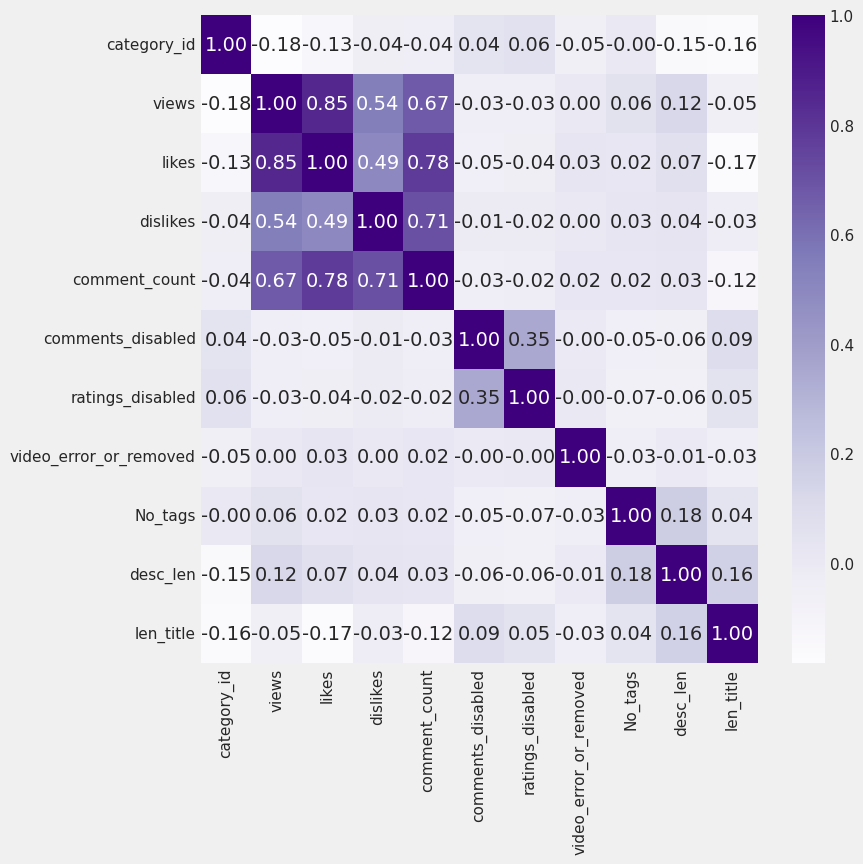

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Purples', annot=True, fmt='.2f')

**Observasi=**

Target = views

*   category_id: -0.18, korelasi *negative* namun hampir tidak memiliki korelasi. **Nomor ID kecil lebih memiliki banyak views**.
*   likes: 0.85, korelasi *highly positive*. **Semakin banyak likes semakin banyak views**.
*   dislikes: 0.54, korelasi *low positive*. **Semakin banyak dislikes semakin banyak views**.
*   comment_count: 0.67, korelasi *low positive*. **Semakin banyak comment_count semakin banyak views**
*   comment_disabled: -0.03, korelasi *negative* namun sangat lemah hampir tidak memiliki korelasi sama sekali. **Jika comment di disable cenderung sedikit views**.
*   ratings_disabled: -0.03, korelasi *negative* namun sangat lemah hampir tidak memiliki korelasi sama sekali. **Jika ratings di disable cenderung sedikit views**,
*   video_error_or_removed: 0.00, sama sekali tidak memiliki korelasi.
*   No_tags: 0.06, korelasi *positive* hampir tidak memiliki korelasi sama sekali. **Semakin tinggi No_tags semakin banyak views**.
*   desc_len: 0.12, korelasi *positive* namun sangat lemah. **Semakin panjang deskripsi semakin banyak views**.
*   len_title: -0.05, korelasi *negative* namun sangat lemah hampir tidak memiliki korelasi sama sekali. **Semakin panjang judul, semakin views sedikit**.
* **Antara dislikes dan comment_counts merupakan data redundant (0,71) sebaiknya dihapus salah satu.**


<Figure size 1500x1500 with 0 Axes>

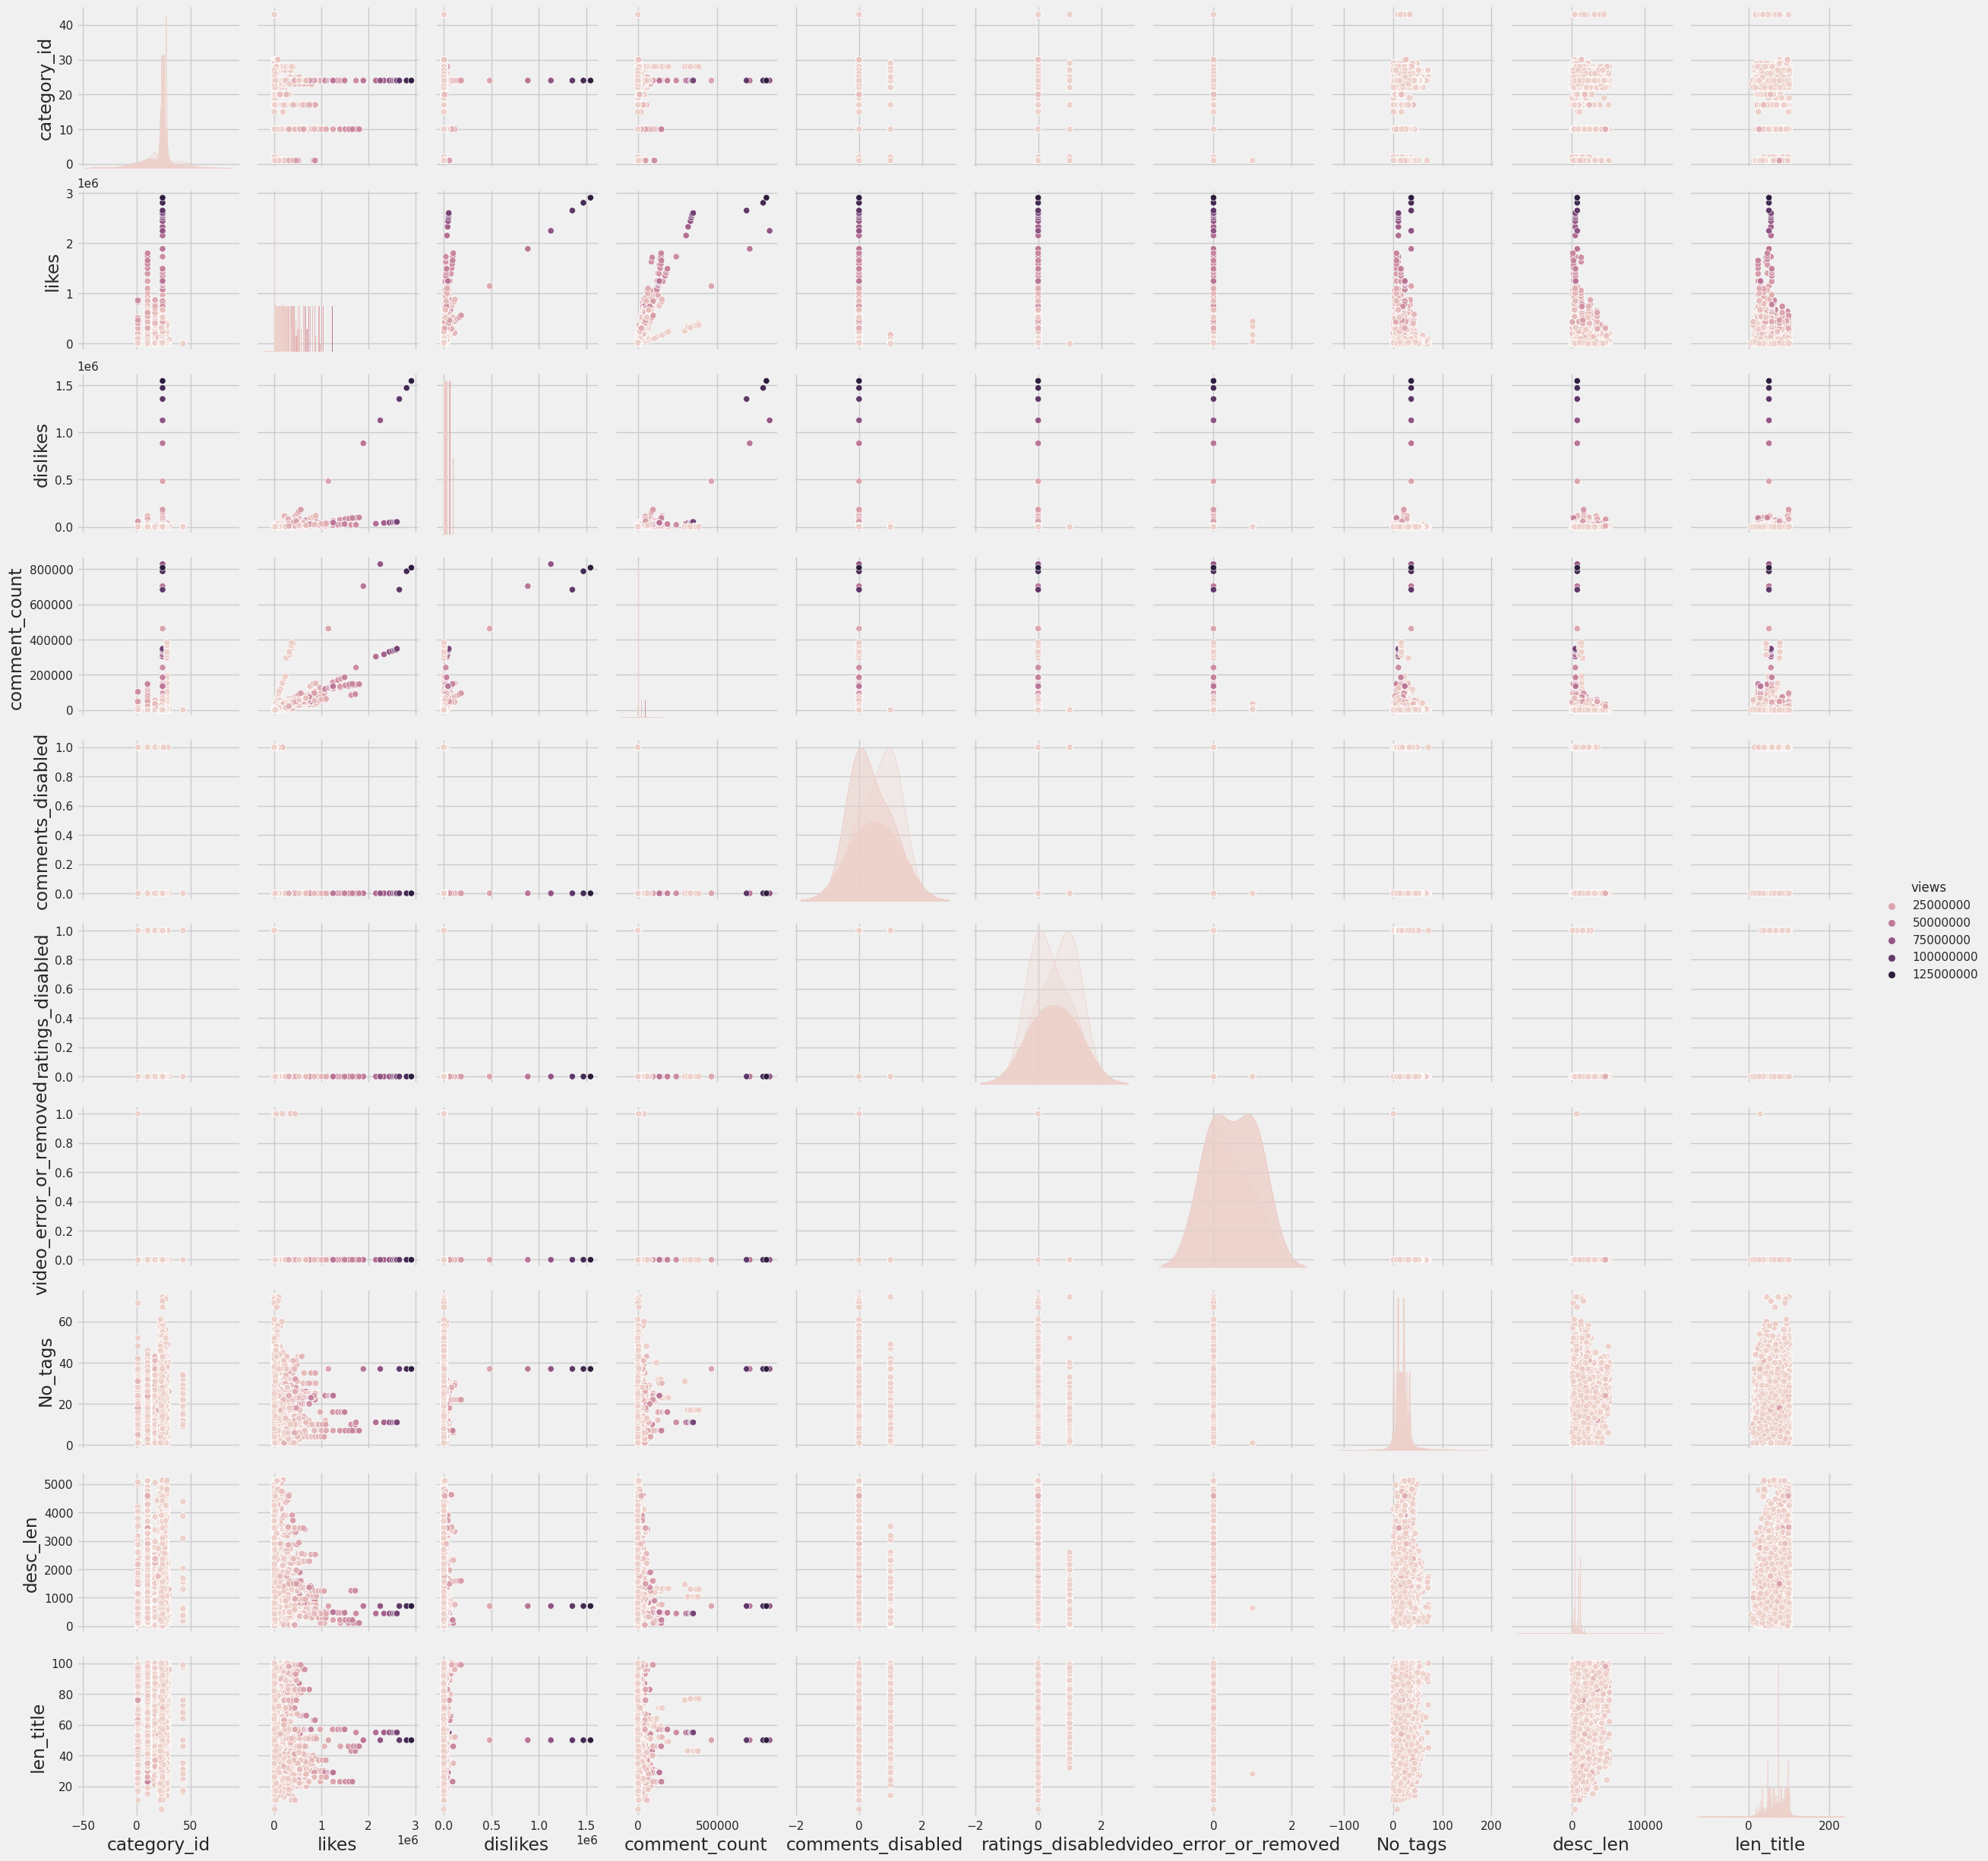

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde',hue='views')

**Observasi=**
* Video dengan komentar dinonaktifkan dengan likes di angka 0,5 sampai 0,8 memiliki 50.000.000 views
* Video dengan rating dinonaktifkan dengan likes di angka 0,2 sampai 0,9 memiliki 25.000.000 views
* Video dengan eror video dengan likes di angka 0,4 sampai 0,8 memiliki 25.000.000 views


# Data Preprocessing

## Missing Value

In [ ]:
missing_value = df.isnull().sum().reset_index()
missing_value.columns = ['features','sum']
missing_value['percentage'] = round((missing_value['sum']/len(df))*100,2)
missing_value.sort_values('percentage',ascending=False,inplace=True)
missing_value.head(5)

,features,sum,percentage
13,description,45,0.12
0,trending_date,0,0.00
1,title,0,0.00
16,len_title,0,0.00
15,desc_len,0,0.00


Meskipun hanya terdapat 0,12% missing values dikarena kolom yang memiliki missing value merupakan kolom kategorikal yang memiliki unique values yang sangat banyak dimana fitur ini dapat menyebabkan ***high variance*** dalam model sehingga dibandingkan melakukan drop missing value, dilakukan drop kolom `description`.

In [ ]:
df = df.drop(['description'],axis=1)

## Duplicate Values

In [ ]:
df.duplicated().sum()

4229

In [ ]:
dup = df.duplicated(keep=False)
df[dup].head(6)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date
1535,2017-11-22,Swag Se Swagat Song | Official Teaser | Salman...,YRF,10,08:40:48,"Salman Khan|""Katrina Kaif""|""Tiger Zinda Hai So...",2790320,46228,5088,3807,False,False,False,25,750,66,2017-11-20
1536,2017-11-22,Incredibles 2 Official Teaser Trailer,Disney•Pixar,1,15:43:11,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",17613871,369519,7892,45240,False,False,False,24,1026,37,2017-11-18
1537,2017-11-22,Jaisi Karni Waisi Bharni - | Lalit Shokeen Fil...,LShokeen Films,24,14:27:43,"lalit shokeen|""lalit shokeen films""|""lalit sho...",733685,31866,883,2392,False,False,False,26,550,50,2017-11-20
1538,2017-11-22,Bomma Adhirindhi Song Trailer | Jawaan Telugu ...,Arunachal Creations,22,17:15:38,"Bomma Adhirindhi Song Trailer|""Jawaan Telugu M...",550261,3184,426,187,False,False,False,25,1459,95,2017-11-19
1539,2017-11-22,Miss World 2017 Top 5 Question and Answer,Beauty Pageants,24,15:02:47,"miss world 2017|""manushi chhillar""|""manushi ch...",7502919,68262,3337,539,False,False,False,38,582,41,2017-11-18
1540,2017-11-22,Official Trailer: Sallu Ki Shaadi | Movie Rele...,T-Series,10,12:36:01,"latest hindi songs|""bollywood""|""songs""|""2017""",700458,7314,1616,769,False,False,False,4,806,67,2017-11-20


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

**Observasi =**
* Dari pemeriksaan data duplikasi dimana terdapat 4229 duplikasi, lalu dilakukan drop_duplicates()

## Outliers

Dari grafik yang kita keluarkan ketika EDA, kita tahu bahwa hampir ada empat kolom numerik memiliki outlier. Sebelum kita mengeluarkan outlier, karena kita tahu bahwa bentuk distribusi kolom-kolom ini condong ke kiri, kita coba normalkan dengan `log transformation` kecuali untuk kolom `category_id`,`len_tittle` (data bukan right skewed):

In [ ]:
right_skew = ['likes','dislikes','comment_count','desc_len','No_tags','views']

Text(-4.4, 140000000, 'Boxplot Original')

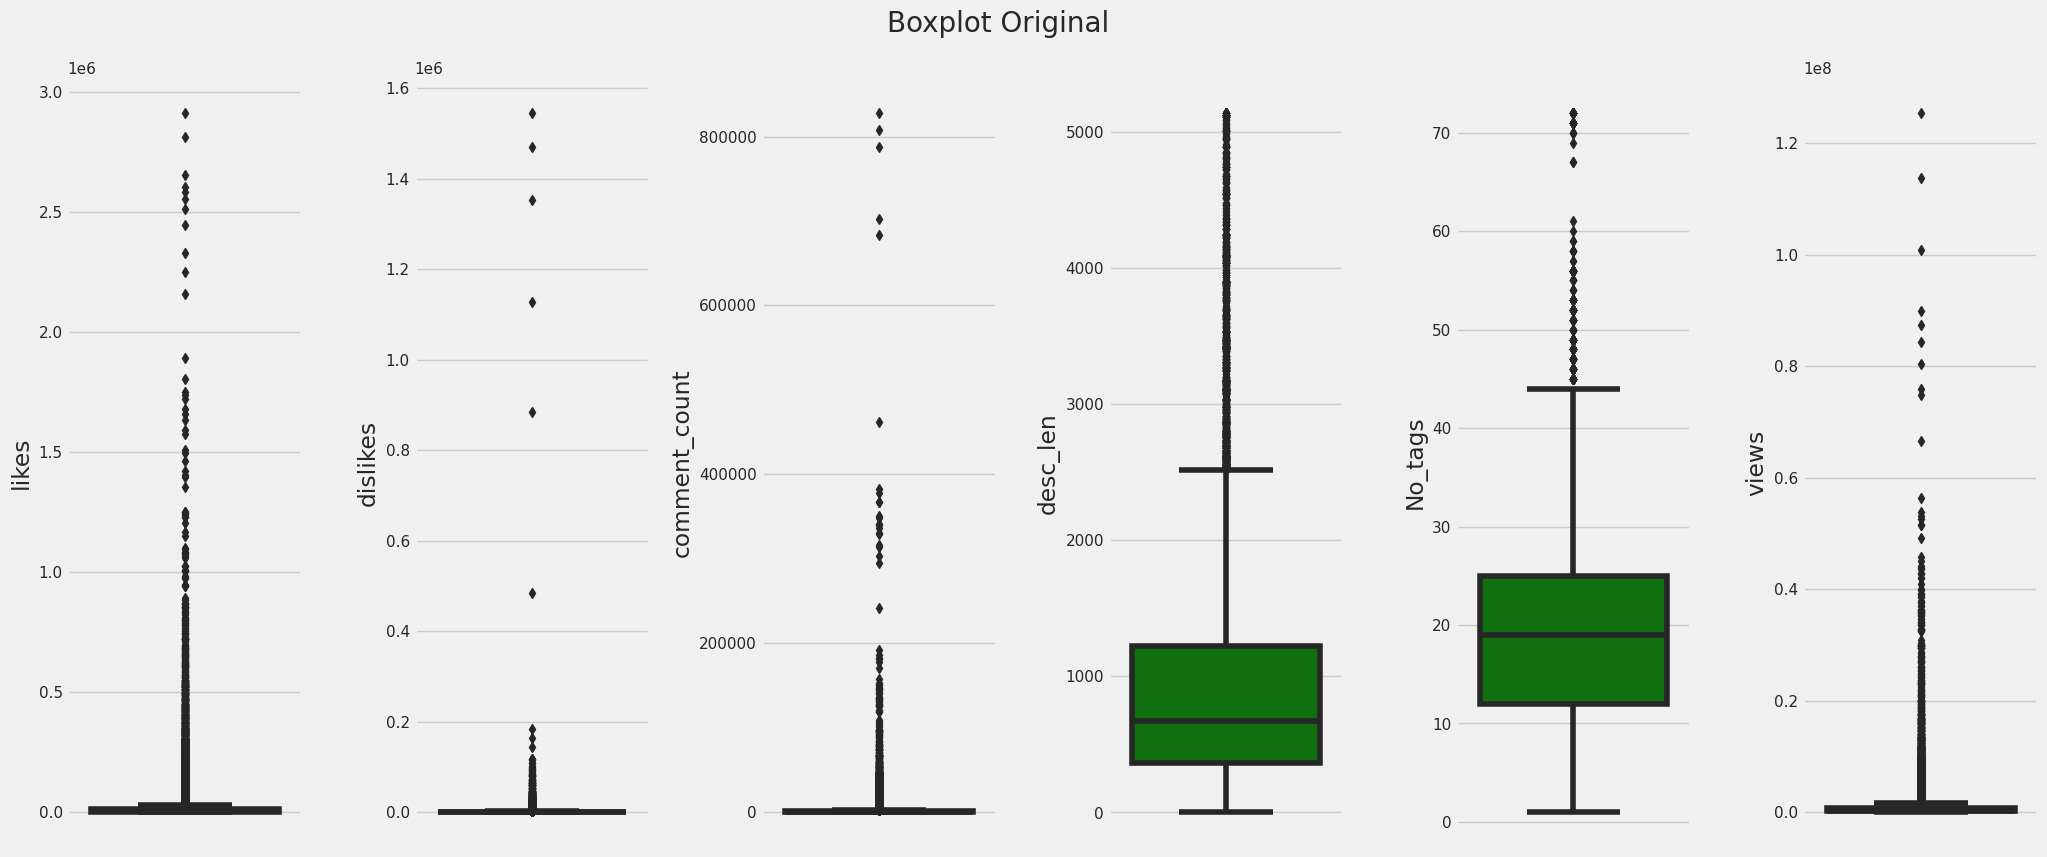

In [ ]:
for i in range(0, len(right_skew)):
    plt.subplot(1, len(right_skew), i+1)
    sns.boxplot(y=df[right_skew[i]], color='green',orient='v')
    plt.tight_layout()
plt.text(-4.4,140000000,s="Boxplot Original",fontsize=20)

Text(-490000000, 8e-07, 'Distribution Original')

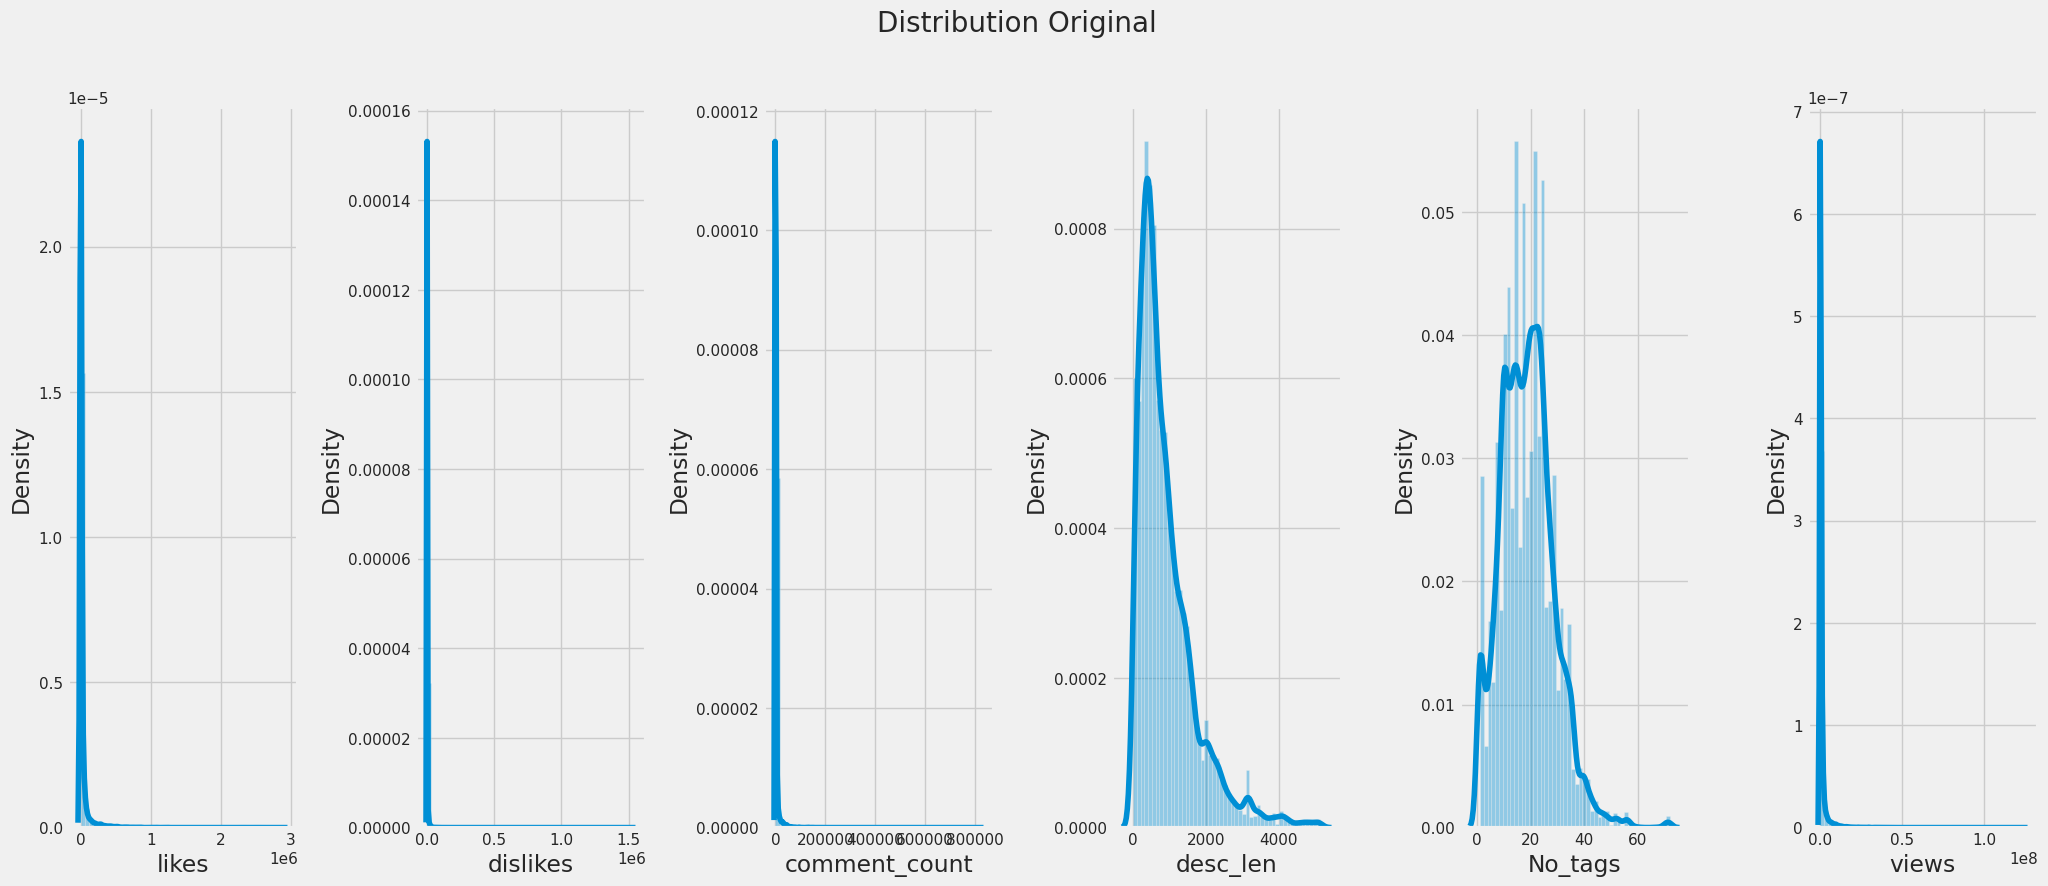

In [ ]:
for i in range(0, len(right_skew)):
    plt.subplot(1, len(right_skew), i+1)
    sns.distplot(df[right_skew[i]], kde=True)
    plt.tight_layout()
plt.text(-490000000,0.0000008,s="Distribution Original",fontsize=20, ha='center', va='top')

In [ ]:
for num in right_skew:
    df['log_'+num] = np.log(df[num] + (df[df[num] > 0][num].min() / 2))

Visualisasi data setelah dilakukan log transformation, data sudah terlihat mendekati normal.

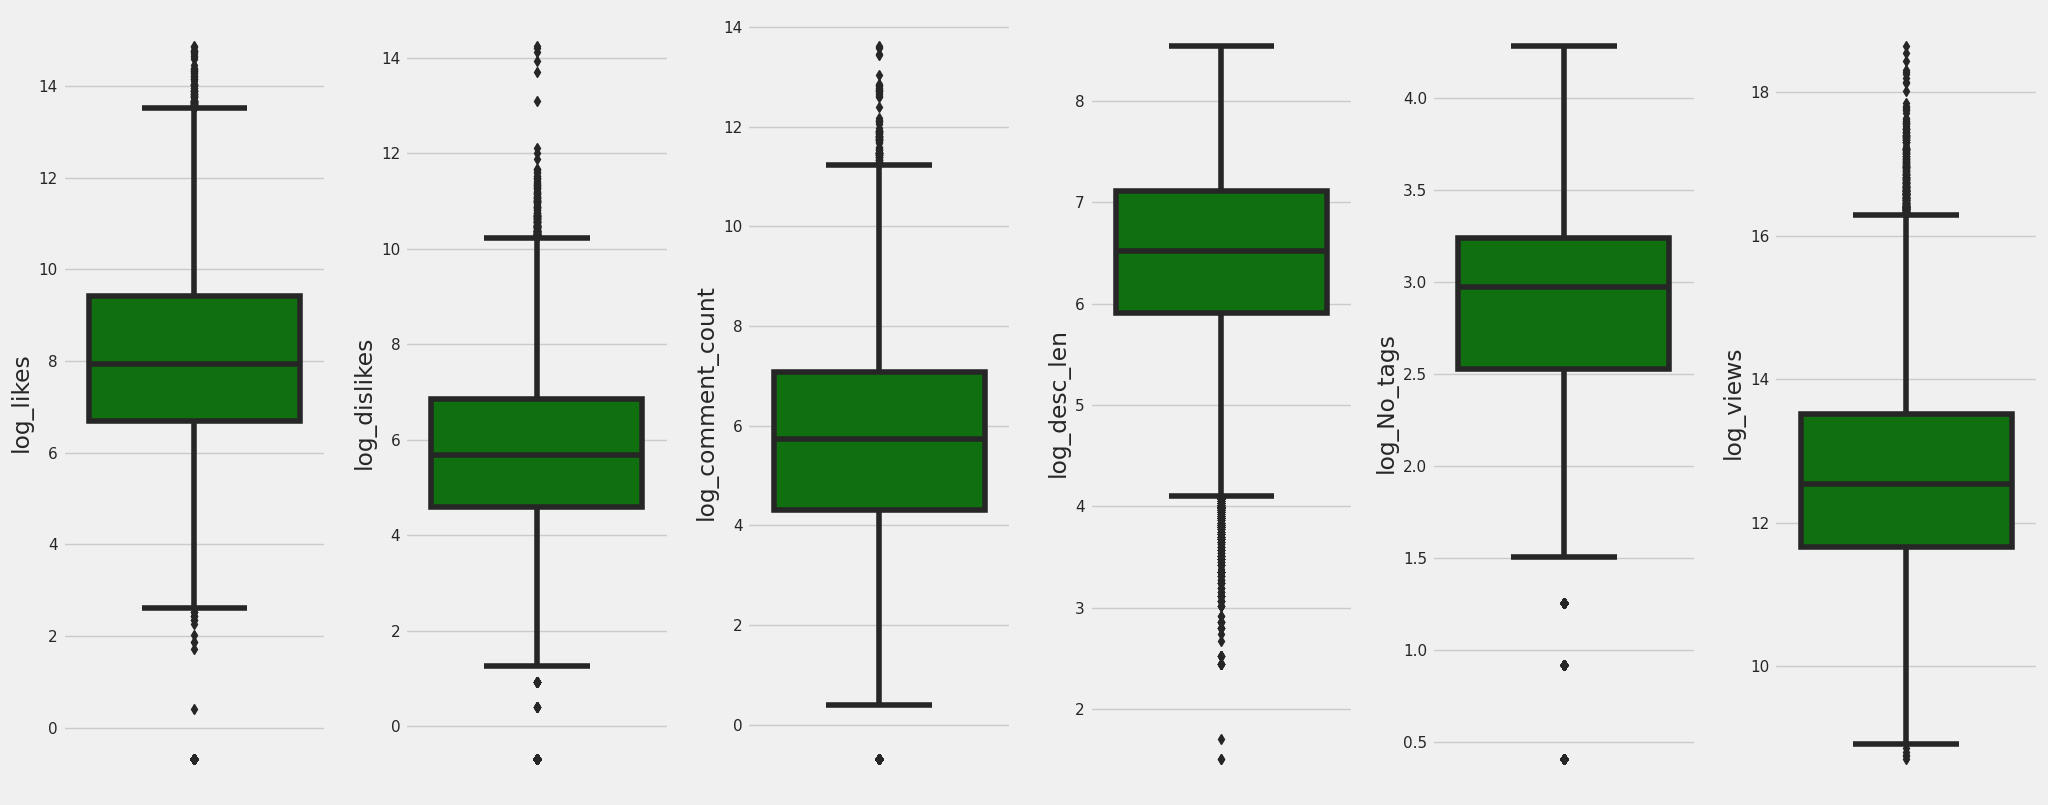

In [ ]:
right_skew = ['log_likes', 'log_dislikes', 'log_comment_count', 'log_desc_len', 'log_No_tags', 'log_views']

for i in range(0, len(right_skew)):
    plt.subplot(1, len(right_skew), i+1)
    sns.boxplot(y=df[right_skew[i]], color='green',orient='v')
    plt.tight_layout()

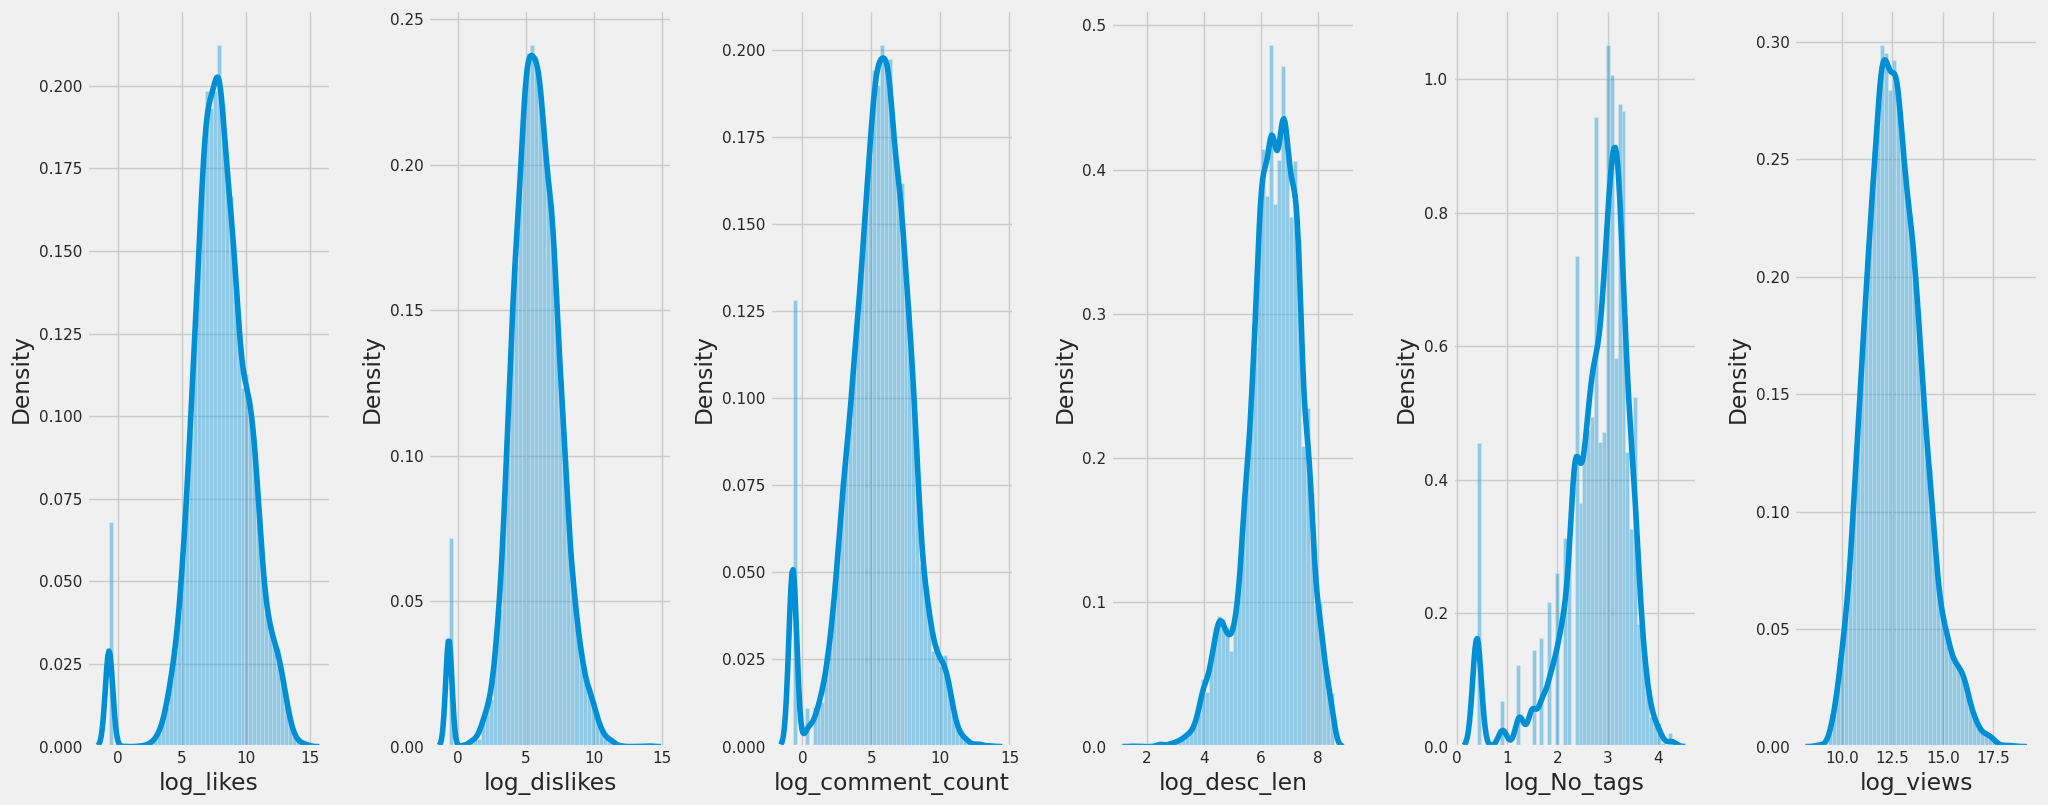

In [ ]:
for i in range(0, len(right_skew)):
    plt.subplot(1, len(right_skew), i+1)
    sns.distplot(df[right_skew[i]], kde=True)
    plt.tight_layout()

Untuk itu maka kita bisa menangani outliers menggunakan z-score.

In [ ]:
print("Jumlah data sebelum menghapus outliers: ", len(df))

for num in right_skew:
  z_scores = np.abs(stats.zscore(df[num]))
  df = df[z_scores <= 3]

print("Jumlah data setelah menghapus outliers: ", len(df))

Jumlah data sebelum menghapus outliers:  32562
Jumlah data setelah menghapus outliers:  30447


Setelah dilakukan penghapusan outliers menggunakan z-score, **terhapus total 2115 data**.

## Normalization/Standardization/Log Transformation


Melakukan *Soft Feature Scaling* dengan menggunakan Standardization untuk melakukan normalisasi data ke seluruh kolom numerik data setelah dilakukan ***Feature Engineering***.

## Feature encoding

Mengubah `publish_date` dan `trending_date` ke nama hari dalam 1 minggu lalu mengkonversinya ke angka dari 0 - 6 untuk memudahkan kerja machine learning.

In [ ]:
df['trending_day'] = pd.to_datetime(df['trending_date']).dt.day_name()

In [ ]:
day_map = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

In [ ]:
df['trending_day'] = df['trending_day'].map(day_map)

In [ ]:
df['publish_day'] = pd.to_datetime(df['publish_date']).dt.day_name()

In [ ]:
df['publish_day'] = df['publish_day'].map(day_map)

Mengubah kolom dengan datatype bool ke int agar lebih mudah diproses oleh model.

In [ ]:
df['comments_disabled'] = df['comments_disabled'].astype(int)
df['ratings_disabled'] = df['ratings_disabled'].astype(int)
df['video_error_or_removed'] = df['video_error_or_removed'].astype(int)

<Axes: >

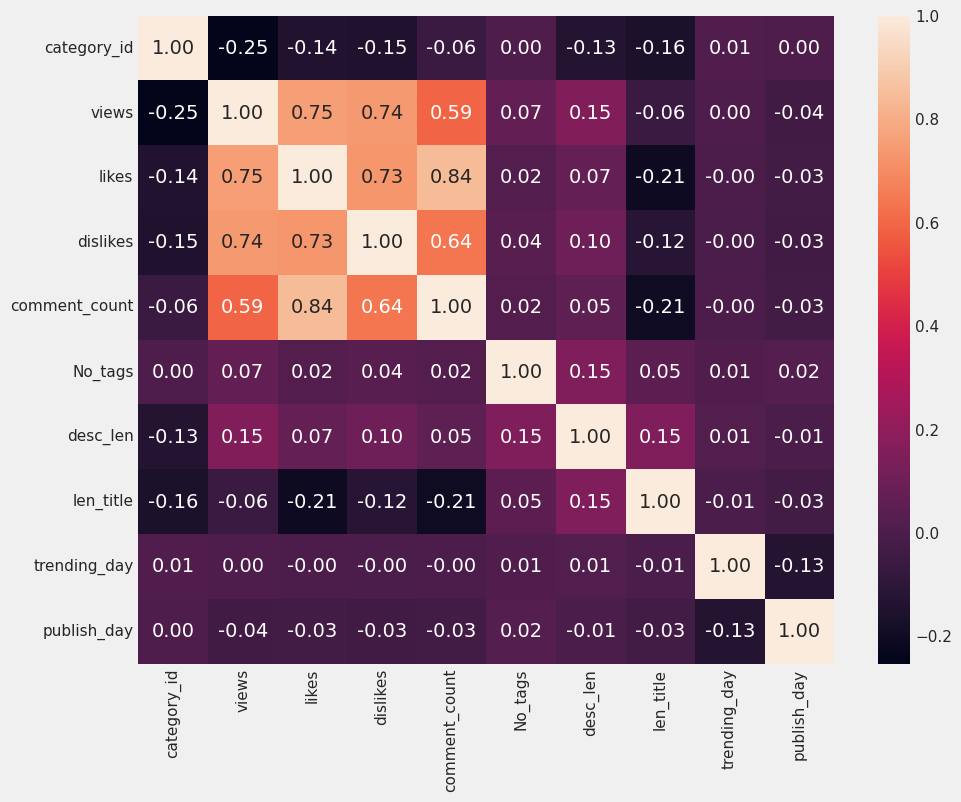

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title','trending_day','publish_day']].corr(), annot=True, fmt='.2f')

* Dapat dilihat bahwa `trending_day`, `publish_day`, dll. (semua yang memiliki korelasi sangat rendah baik negative maupun positive) tidak memiliki korelasi dengan target.
* Sehingga dapat disimpulkan bahwa feature yang memiliki korelasi kuat dengan `views` adalah `likes`, `dislikes`, `comment_count`. Namun karena terdapat multikoleniaritas feature `comment_count` harus dihapuskan.

## Class imbalance

**Observasi =**
* Tidak dilakukan oversampling maupun undersampling untuk dataset ini dikarenakan model yang ini merupakan model regresi, dimana model regresi adalah prediksi nilai kontinu dengan skala yang tidak menentu yang tidak dipengaruhi oleh mayoritas/minoritas data.

## Kesimpulan
Dari hasil EDA features yang sebaiknya digunakan meliputi `'category_id'`, `'likes'`, `'dislikes'`, `'No_tags'`, `'desc_len'`, `'len_title'` untuk memprediksi views setelah dilakukan transformasi (scaling) di ***feature engineering***.

# Feature Engineering

In [ ]:
# Membuat kolom yang menunjukan trending dengan jumlah likes dan jumlah comment (comment_count)
df['trending'] = df['likes'] + df['comment_count']


# Membuat kolom yang menunjukan video paling disukai dengan jumlah likes
df['most_liked'] = df['likes'] >=200

# Membuat kolom jam menjadi 1 - 24 tanpa menit dan detik.
df['publish_hour'] = pd.to_datetime(df['publish_time']).dt.round("H").dt.strftime("%H").astype(int)

df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,log_dislikes,log_comment_count,log_desc_len,log_No_tags,log_views,trending_day,publish_day,trending,most_liked,publish_hour
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,6.682735,6.782759,6.826003,2.740840,13.909310,2,0,34848,True,12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,6.807382,-0.693147,7.711325,2.970414,13.291453,2,1,735,True,6
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,5.495117,5.007296,6.181051,2.674149,13.073173,2,0,2160,True,16
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,7.392955,7.895250,5.577841,3.020425,14.034399,2,0,73037,True,7
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,5.681878,4.197202,6.626055,2.442347,13.051999,2,1,558,True,1


In [ ]:
# FEATURE yang digunakan

features = ['category_id','likes','dislikes','No_tags','desc_len','len_title', 'comment_count', 'trending', 'most_liked', 'publish_hour']

x = df[features]
y = df['views']

print (x)
print (y)

       category_id  likes  dislikes  No_tags  desc_len  len_title  \
0                1  33966       798       15       920         81   
1               25    735       904       19      2232         58   
2               24   2011       243       14       482         58   
3               23  70353      1624       20       263         30   
4               24    492       293       11       753         88   
...            ...    ...       ...      ...       ...        ...   
36738           24  18060       165        7       132         31   
36739           24  96485      4181       37      1398         72   
36740           17  13316       552       31       320         87   
36758           23  85601      4677       13       441         32   
36769           23  11170       393       24      1207         67   

       comment_count  trending  most_liked  publish_hour  
0                882     34848        True            12  
1                  0       735        True           

## Melakukan Transformation

In [ ]:
from scipy.stats import boxcox
new_nml = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title','trending_day','publish_day','most_liked','trending', 'publish_hour']
# Kalau ada tambahan features dimasukin ya ke variable new_nml

for num in new_nml:
    df['nml_'+num],_ = boxcox(df[num]+1)

In [ ]:
nums_nml = ['nml_category_id', 'nml_views', 'nml_likes', 'nml_dislikes', 'nml_comment_count', 'nml_No_tags', 'nml_desc_len', 'nml_len_title','nml_most_liked','nml_trending', 'nml_publish_hour']
# Ini juga kalau ada tambahan features dimasukin jangan lupa kasih nml_

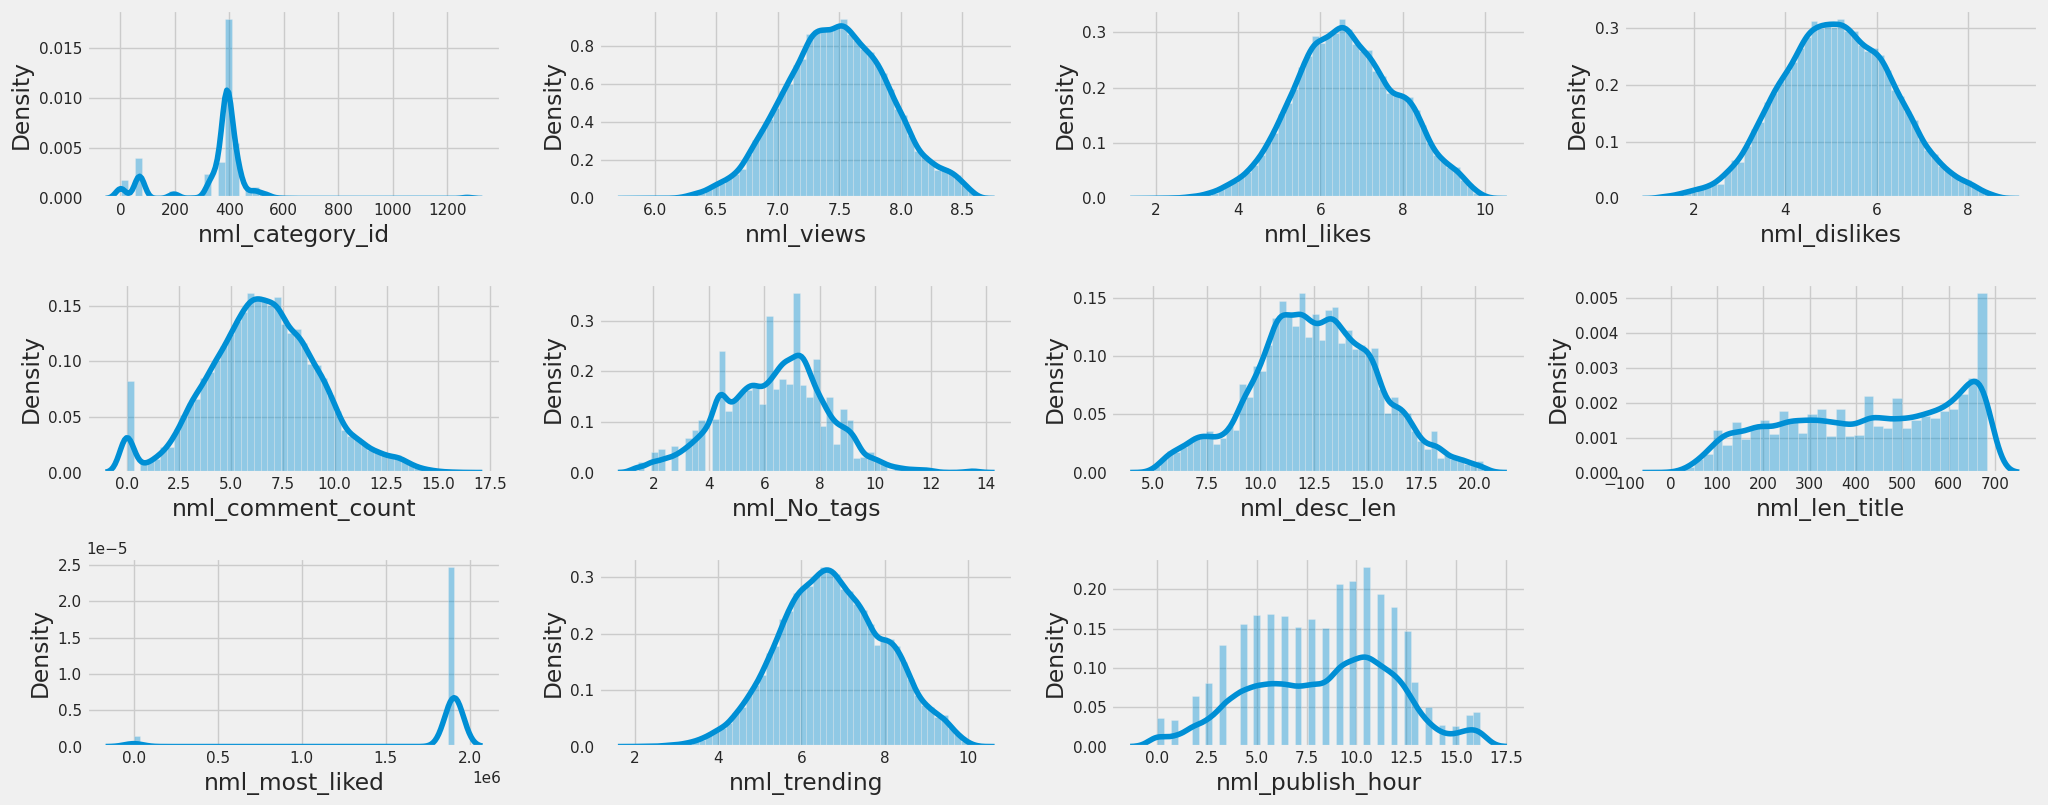

In [ ]:
k = int((len(nums_nml)+2)/3)
for i in range(0, len(nums_nml)):
    plt.subplot(3, k, i+1)
    sns.distplot(df[nums_nml[i]], kde=True)
    plt.tight_layout()

# Training Model & View Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance

In [ ]:
# Kolom target yang ingin diprediksi adalah 'nml_views'
x = df[['nml_category_id', 'nml_likes', 'nml_dislikes', 'nml_comment_count', 'nml_No_tags', 'nml_desc_len', 'nml_len_title', 'nml_most_liked', 'nml_trending', 'publish_hour']]
y = df['nml_views']

# Pisahkan data menjadi data pelatihan dan data pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# buat train and test dataset
data_train = pd.concat([x_train, y_train], axis=1)
data_test  = pd.concat([x_test, y_test], axis=1)

# Standardize the data
scaler    = RobustScaler()
scaler.fit(data_train)
std_train = scaler.transform(data_train)
std_test  = scaler.transform(data_test)

# Turn into data frame
std_train = pd.DataFrame(std_train, columns=data_train.columns)
std_test  = pd.DataFrame(std_test, columns=data_test.columns)

# Re-split the data
xtrain_std = std_train.drop("nml_views", axis=1)
ytrain_std = std_train.nml_views
xtest_std  = std_test.drop("nml_views", axis=1)
ytest_std  = std_test.nml_views

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(y_test, pred):
    print("MAE: %.2f" % mean_absolute_error(y_test, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(y_test, pred)) # Explained variance score: 1 is perfect prediction

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
models = {
    "Linear"     : LinearRegression(n_jobs=-1),
    "Ridge"      : Ridge(),
    "Lasso"      : Lasso(),
    "Elasticnet" : ElasticNet(),
    "DT"         : DecisionTreeRegressor(),
    "RF"         : RandomForestRegressor(n_jobs=-1),
    "SVR"        : SVR(),
    "Xgb"        : XGBRegressor()
}

for model_name, model in models.items():
    model.fit(xtrain_std, ytrain_std)

    print("Evaluate model: {}".format(model_name))
    print('test:')
    y_pred = model.predict(xtest_std)
    print(eval_regression(ytest_std, y_pred), "\n")
    print('train')
    y_pred = model.predict(xtrain_std)
    print(eval_regression(ytrain_std, y_pred), "\n")

Evaluate model: Linear
test:
MAE: 0.27
RMSE: 0.34
R2 score: 0.79
None 

train
MAE: 0.27
RMSE: 0.34
R2 score: 0.78
None 

Evaluate model: Ridge
test:
MAE: 0.27
RMSE: 0.34
R2 score: 0.79
None 

train
MAE: 0.27
RMSE: 0.34
R2 score: 0.78
None 

Evaluate model: Lasso
test:
MAE: 0.55
RMSE: 0.68
R2 score: 0.13
None 

train
MAE: 0.54
RMSE: 0.68
R2 score: 0.13
None 

Evaluate model: Elasticnet
test:
MAE: 0.54
RMSE: 0.67
R2 score: 0.16
None 

train
MAE: 0.54
RMSE: 0.67
R2 score: 0.16
None 

Evaluate model: DT
test:
MAE: 0.24
RMSE: 0.35
R2 score: 0.77
None 

train
MAE: 0.00
RMSE: 0.00
R2 score: 1.00
None 

Evaluate model: RF
test:
MAE: 0.17
RMSE: 0.24
R2 score: 0.89
None 

train
MAE: 0.06
RMSE: 0.09
R2 score: 0.98
None 

Evaluate model: SVR
test:
MAE: 0.55
RMSE: 0.68
R2 score: 0.13
None 

train
MAE: 0.54
RMSE: 0.68
R2 score: 0.13
None 

Evaluate model: Xgb
test:
MAE: 0.18
RMSE: 0.24
R2 score: 0.89
None 

train
MAE: 0.14
RMSE: 0.19
R2 score: 0.93
None 

